# Rainbow Six Siege Operator Classification

Problem: Given the details such as armor, speed etc, we try to predic the role of a given operator as an attacker or a defender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('operators.csv')
df

,Organization,Name,Role,Armor,Speed,Difficulty,Primary1,Primary2,Primary3,Secondary1,Secondary2,Gadget1,Gadget2
0,APCA,AMARU,ATTACKER,2,2,2,G8A1,SUPERNOVA,NaN,ITA12S,SMG-11,CLAYMORE,STUN GRENADE
1,APCA,GOYO,DEFENDER,2,2,2,VECTOR .45 ACP,TCSG12,NaN,P229,NaN,IMPACT GRENADE,NITRO CELL
2,JAEGER CORPS,NOKK,ATTACKER,2,2,3,FMG-9,SIX12 SD,NaN,5.7 USG,D-50,CLAYMORE,BREACH CHARGE
3,JAEGER CORPS,WARDEN,DEFENDER,3,1,2,M590A1,MPX,NaN,P-10C,SMG-12,DEPLOYABLE SHIELD,BARBED WIRE
4,SASR,MOZZIE,DEFENDER,2,2,2,COMMANDO 9,P10 RONI,NaN,SUPER SHORTY,SDP 9MM,BARBED WIRE,NITRO CELL
5,SASR,GRIDLOCK,ATTACKER,3,1,1,F90,M249 SAW,NaN,SUPER SHORTY,SDP 9MM,SMOKE GRENADE,BREACH CHARGE
6,GIGR,NOMAD,ATTACKER,2,2,3,AK-74M,ARX200,NaN,.44 MAG SEMI-AUTO,NaN,STUN GRENADE,BREACH CHARGE
7,GIGR,KAID,DEFENDER,3,1,2,AUG A3,TCSG12,NaN,.44 MAG SEMI-AUTO,NaN,NITRO CELL,IMPACT GRENADE
8,MPS,CLASH,DEFENDER,3,1,3,CCE SHIELD,NaN,NaN,P-10C,SPSMG9,BARBED WIRE,IMPACT GRENADE
9,MPS,MAVERICK,ATTACKER,1,3,2,AR-15.50,M4,NaN,1911 TACOPS,NaN,STUN GRENADE,CLAYMORE


C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='count'>

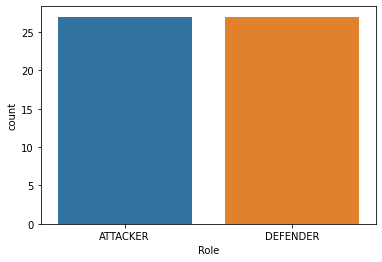

In [3]:
sns.countplot(df["Role"])

We find an extremely balanced dataset with 25 attackers and 25 defenders each

<AxesSubplot:>

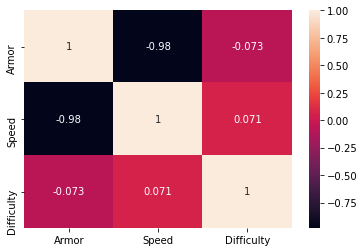

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
df.isnull().sum()

Organization     0
Name             0
Role             0
Armor            0
Speed            0
Difficulty       0
Primary1         0
Primary2         5
Primary3        45
Secondary1       0
Secondary2      20
Gadget1          0
Gadget2          0
dtype: int64

In [6]:
df.drop(columns=["Primary3","Secondary2","Primary1","Primary2","Secondary1","Secondary2","Organization"],inplace=True)

In [7]:
df

,Name,Role,Armor,Speed,Difficulty,Gadget1,Gadget2
0,AMARU,ATTACKER,2,2,2,CLAYMORE,STUN GRENADE
1,GOYO,DEFENDER,2,2,2,IMPACT GRENADE,NITRO CELL
2,NOKK,ATTACKER,2,2,3,CLAYMORE,BREACH CHARGE
3,WARDEN,DEFENDER,3,1,2,DEPLOYABLE SHIELD,BARBED WIRE
4,MOZZIE,DEFENDER,2,2,2,BARBED WIRE,NITRO CELL
5,GRIDLOCK,ATTACKER,3,1,1,SMOKE GRENADE,BREACH CHARGE
6,NOMAD,ATTACKER,2,2,3,STUN GRENADE,BREACH CHARGE
7,KAID,DEFENDER,3,1,2,NITRO CELL,IMPACT GRENADE
8,CLASH,DEFENDER,3,1,3,BARBED WIRE,IMPACT GRENADE
9,MAVERICK,ATTACKER,1,3,2,STUN GRENADE,CLAYMORE


C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='count'>

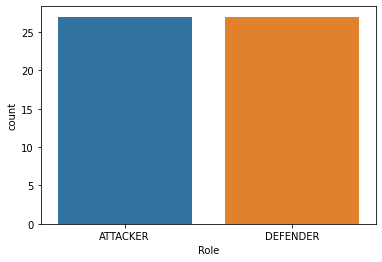

In [8]:
sns.countplot(df["Role"])

In [9]:
df.isnull().sum()

Name          0
Role          0
Armor         0
Speed         0
Difficulty    0
Gadget1       0
Gadget2       0
dtype: int64

In [10]:
roles={
    "ATTACKER":1,
    "DEFENDER":0
}

df.replace({"Role":roles},inplace=True)

In [11]:
gadgets={
    "CLAYMORE":0,
    "IMPACT GRENADE":1,
    'DEPLOYABLE SHIELD':2,
    'BARBED WIRE':3,
    'SMOKE GRENADE':4,
    'STUN GRENADE':5,
    'NITRO CELL':6,
    'BREACH CHARGE':7,
    'BULLETPROOF CAMERA':8,
    'FRAG GRENADE':9,
    ' BULLETPROOF CAMERA':8,
}
df.replace({"Gadget1":gadgets},inplace=True)

In [12]:
df.replace({"Gadget2":gadgets},inplace=True)
df["Gadget2"].unique()

array([5, 6, 7, 3, 1, 0, 2, 9, 8, 4], dtype=int64)

In [13]:
df.drop(columns=["Name"],inplace=True)

<AxesSubplot:>

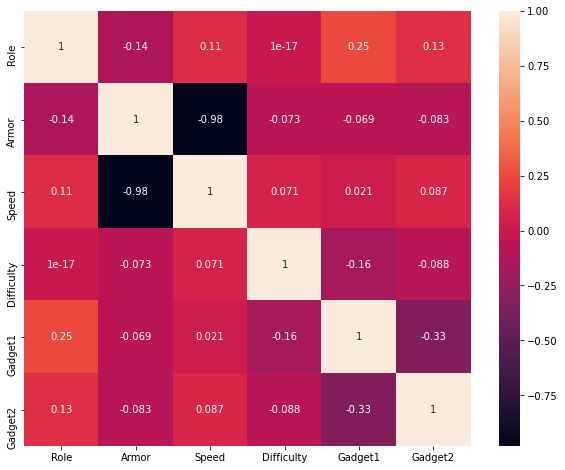

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()
trans=scaler.fit_transform(df.drop(columns=['Role']))

In [18]:
trans=pd.DataFrame(trans,columns=df.columns[1:])
trans

,Armor,Speed,Difficulty,Gadget1,Gadget2
0,0.5,0.5,0.5,0.000000,0.555556
1,0.5,0.5,0.5,0.111111,0.666667
2,0.5,0.5,1.0,0.000000,0.777778
3,1.0,0.0,0.5,0.222222,0.333333
4,0.5,0.5,0.5,0.333333,0.666667
5,1.0,0.0,0.0,0.444444,0.777778
6,0.5,0.5,1.0,0.555556,0.777778
7,1.0,0.0,0.5,0.666667,0.111111
8,1.0,0.0,1.0,0.333333,0.111111
9,0.0,1.0,0.5,0.555556,0.000000


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc=DecisionTreeClassifier(criterion="entropy")
X=df.drop(columns=["Role","Armor","Gadget1"])
y=df["Role"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
predictions= dtc.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
print(confusion_matrix(y_test,predictions))

[[9 0]
 [0 9]]


In [27]:
print("Accuracy: ",accuracy_score(y_test,predictions)*100,"%")

Accuracy:  100.0 %
